In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("Furniture.csv")

In [8]:
df.head(5)

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [10]:
df.shape

(2500, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [14]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

In [16]:
df.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832


In [18]:
df.isnull().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

In [22]:
df.duplicated().sum()

0

<Axes: >

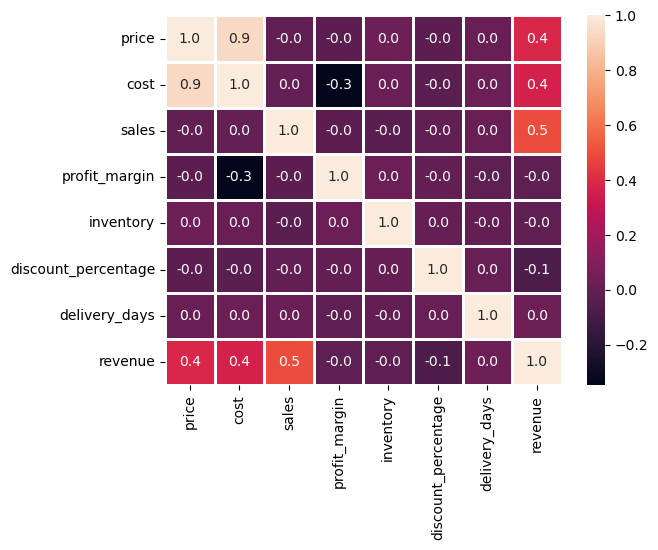

In [34]:
numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix= numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.1f', linewidths=2)

Text(0.5, 1.0, 'Sales Distribution Category wise')

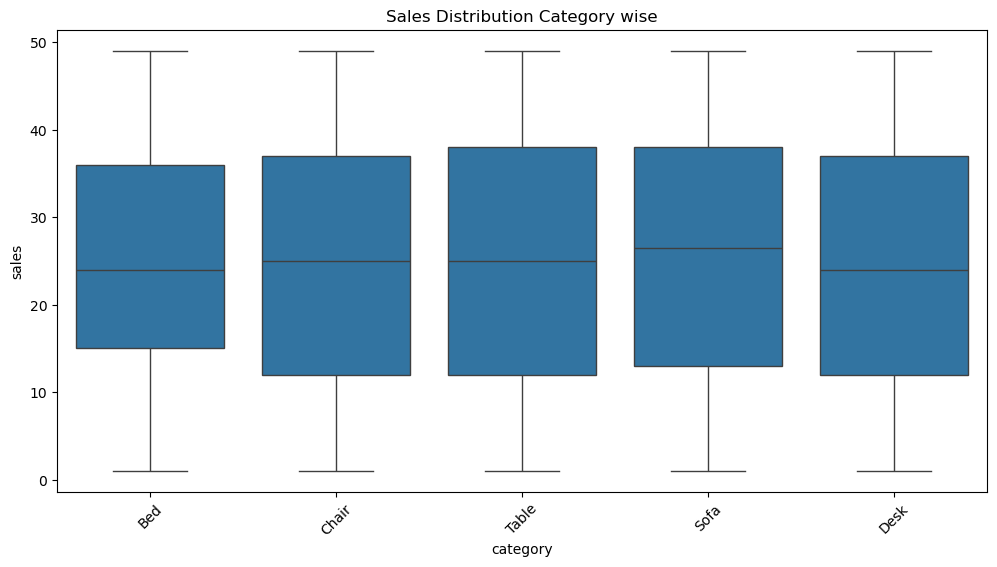

In [40]:
#sales vs product category
plt.figure(figsize=(12,6))
sns.boxplot(x='category',y='sales',data=df)
plt.xticks(rotation=45)
plt.title("Sales Distribution Category wise")


<Axes: xlabel='discount_percentage', ylabel='profit_margin'>

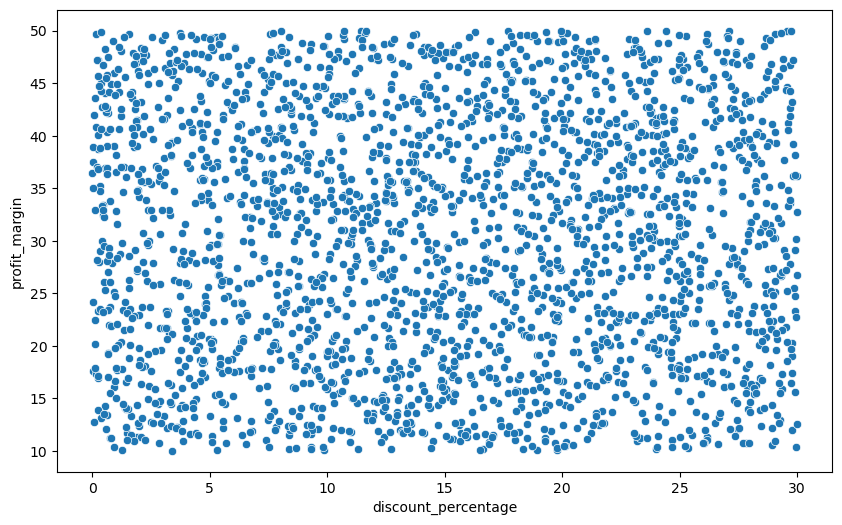

In [42]:
#Profit margin vs discount percentage
plt.figure(figsize=(10,6))
sns.scatterplot(x='discount_percentage',y='profit_margin',data=df)

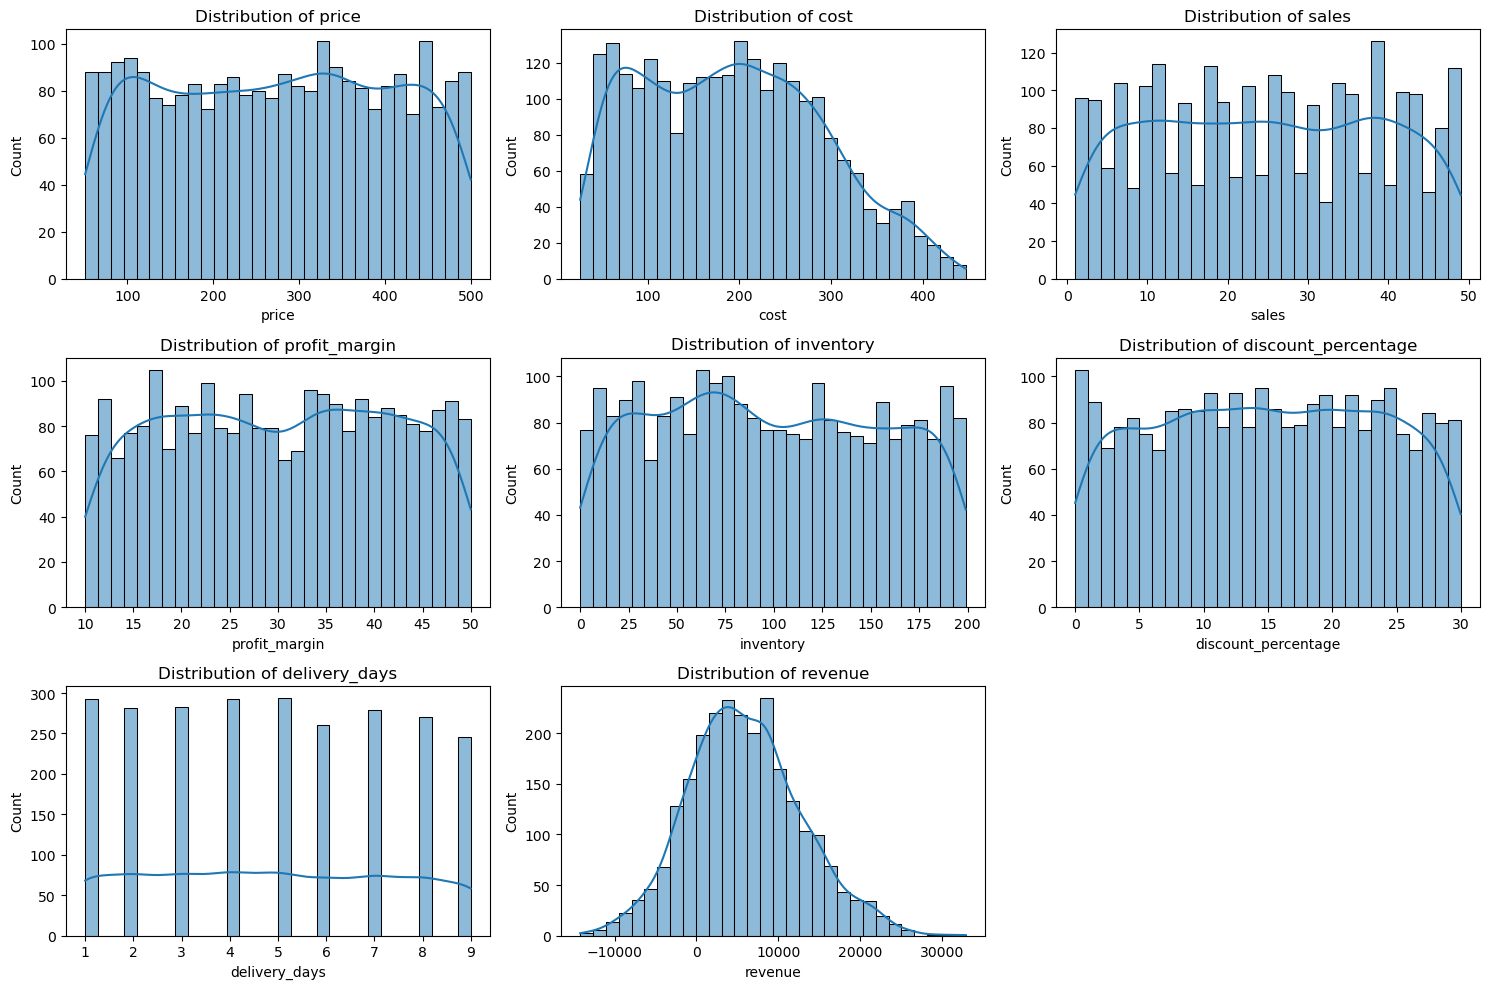

In [44]:
# Define numerical features
numerical_features = ['price', 'cost', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'revenue']

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

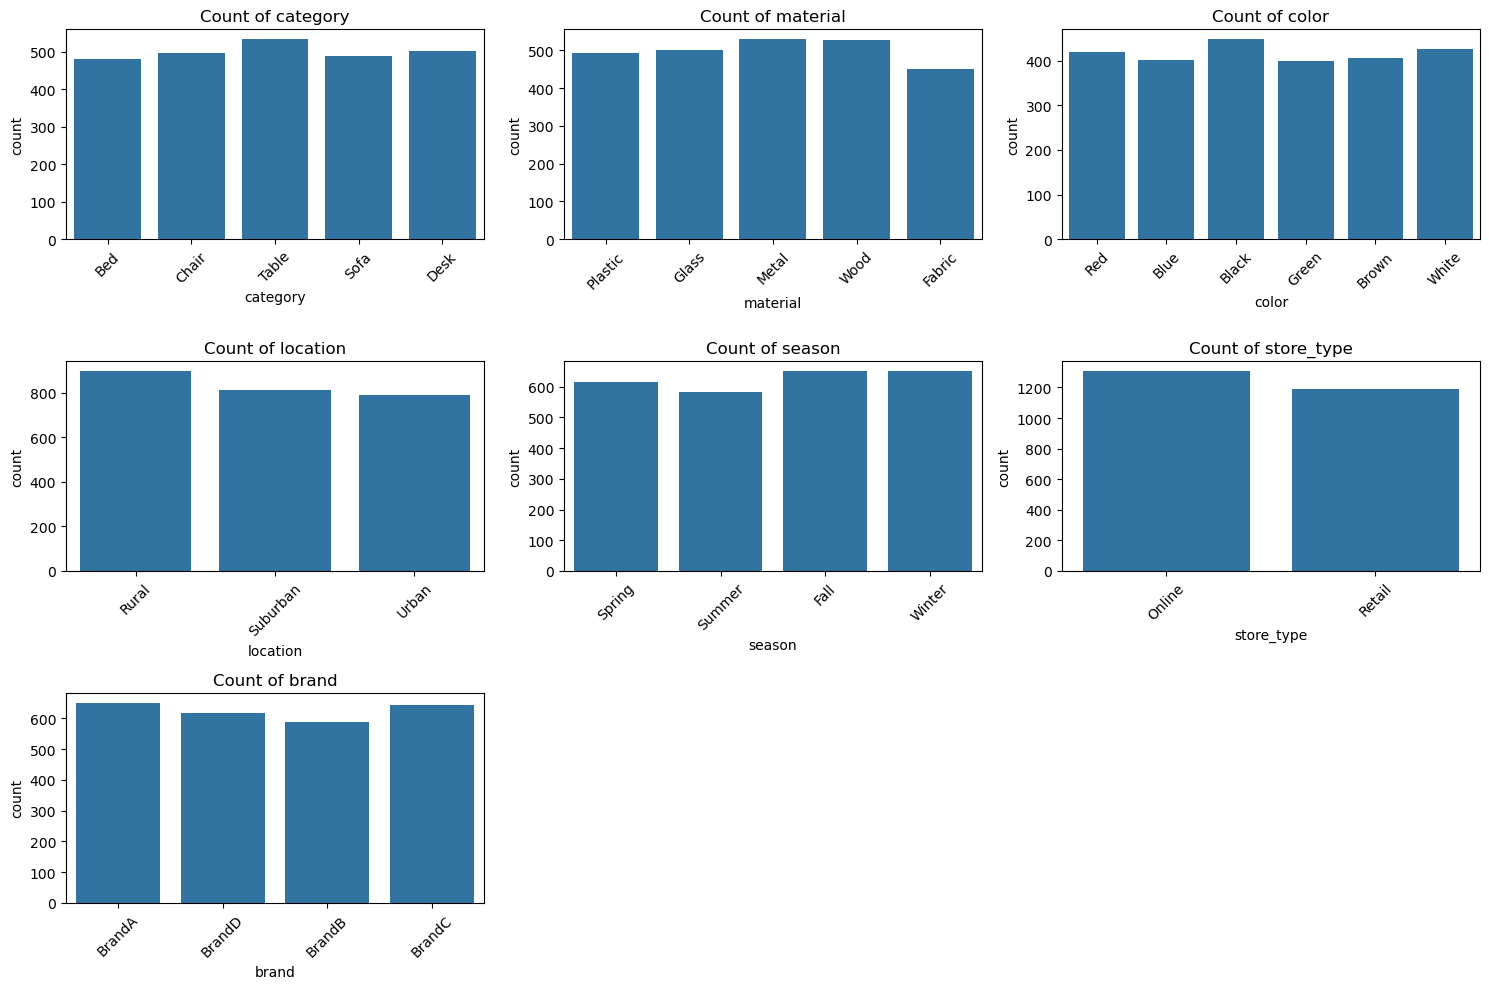

In [46]:
# Define categorical features
categorical_features = ['category', 'material', 'color', 'location', 'season', 'store_type', 'brand']

# Plot bar charts for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()